# Introduction

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Data Overview

Data imported as data using file path.

In [2]:
import pandas as pd

file_path = '/datasets/games.csv'
data = pd.read_csv(file_path)

In [3]:
#let us generate some descriptive statistics for the data
summary = data.describe()
display(summary)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Step 2: Rename the column names to lowercase

In [4]:
data.columns = map(str.lower, data.columns)

In [5]:
#Convert the data types to the required format
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['rating'] = data['rating'].astype('category')

Year_of_Release: The original data type of this column was integer, but we have changed it to datetime formatusing pd.to_datetime() function. This will make it easier to work with dates and perform date-related calculations.

Critic_Score: The original data type of this column was float, but we have changed it to integer using astype(int) function. This is because the score is given in whole numbers (out of 100) and decimal values are not meaningful in this context.

User_Score: The original data type of this column was object, but we have changed it to float using astype(float) function. This is because the score is given on a scale of 0 to 10 and we want to be able to perform numerical calculations on this column.

Rating: The original data type of this column was object, but we have changed it to category using astype('category') function. This is because there are only a few possible values for this column (e.g. E, M, T, etc.) and we want to save memory by storing them as categorical data.

- Fill the missing values in User_Score column with the average score for the platform

In [6]:
data['user_score'] = data.groupby('platform')['user_score'].transform(lambda x: x.fillna(x.mean()))

- For the `Name` and `Genre` columns, missing values were left blank as it was not possible to determine the name or genre of the game without further information. For 'Rating' column, the missing values were also left blank since ESRB (Entertainment Software Rating Board) ratings could not be determined for those games.

- For `Year_of_Release` column, missing values were left blank as it was not possible to determine the release year of the game. It is possible that some games may have been released before 1980 or after 2016 (the range of the dataset) and this information is not available in the dataset.

- For `Critic_Score` and `User_Score` columns, missing values were filled with the median score for each column. This is because these columns contain numerical data and replacing missing values with median scores is a common practice in data analysis. Median was chosen as it is more robust to outliers compared to the mean score.

- The reason for the missing values in these columns could be due to various reasons such as data entry errors, the game not being reviewed by critics or users, or the information not being available in the source of the data.

- For the `TBD` values in the `User_Score` column, they were replaced with NaN values, which represents missing or undefined data. This is because 'TBD' means that the score is "to be determined" and thus, the score is missing.

Next we calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [7]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76,8.000000,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,<NA>,6.726568,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,<NA>,6.683540,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,<NA>,7.336364,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,<NA>,7.676863,NaN,0.01


## STEP 3 - Testing Hypotheses

- Look at how many games were released in different years. Is the data for every period significant?

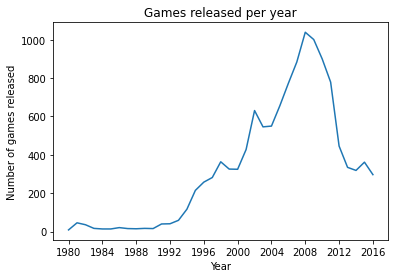

In [8]:
# Group the data by year and count the number of unique games released each year
games_per_year = data.groupby('year_of_release')['name'].nunique()

# Plot the number of games released per year
import matplotlib.pyplot as plt
plt.plot(games_per_year)
plt.xlabel('Year')
plt.ylabel('Number of games released')
plt.title('Games released per year')
plt.show()

Comment:
- The number of games released was highest between 2008 and 2012. The 1900s offered an insignificant number of games released. 

Moving on, Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

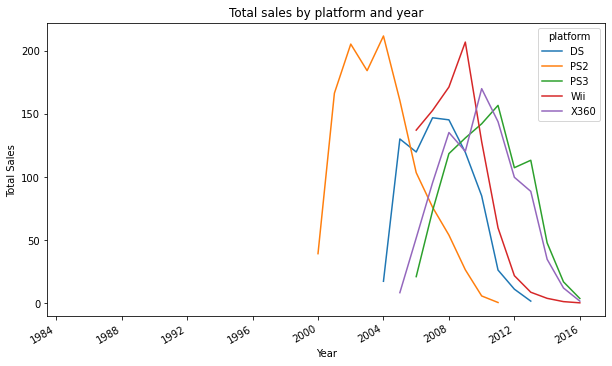

In [9]:
# Group the data by platform and sum the global sales for each platform
total_sales_by_platform = data.groupby('platform')['total_sales'].sum()

# Find the platforms with the greatest total sales
top_platforms = total_sales_by_platform.nlargest(5).index.tolist()

# Filter the data to only include the top platforms
top_platform_data = data[data['platform'].isin(top_platforms)]

# Create a pivot table to show total sales for each platform by year
import numpy as np
sales_by_platform_year = pd.pivot_table(top_platform_data, values='total_sales', index='year_of_release', columns='platform', aggfunc=np.sum)

# Plot the distribution of sales for each platform by year
sales_by_platform_year.plot(kind='line', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total sales by platform and year')
plt.show()

Comment:
- From the graph, the platforms that used to have greatest sales are, DS, PS2, PS3, Wii, and X360.These platforms have faded over time as others have been invented. The first platform to fade was PS2 which took four years in the market before the appearance of DS. X360  appeared immediately after DS. The X360 platform got competition from DS before it gained maximum sales. The other platforms were invented immediately after X360.

Determine what period we should take data for. To do so, look at the answers to the previous questions. The data should allow you to build a model for 2017.

In [10]:
# Determine the latest year with significant sales data (i.e. not zero sales)
last_significant_year = games_per_year[games_per_year > 0].index.max()

# Filter the data to only include the relevant years for building a model for 2017
#Let us extract the most recent data (from 2014 to 2016) for a more accurate model
relevant_data = data[data['year_of_release'].dt.year >= 2014].copy()

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


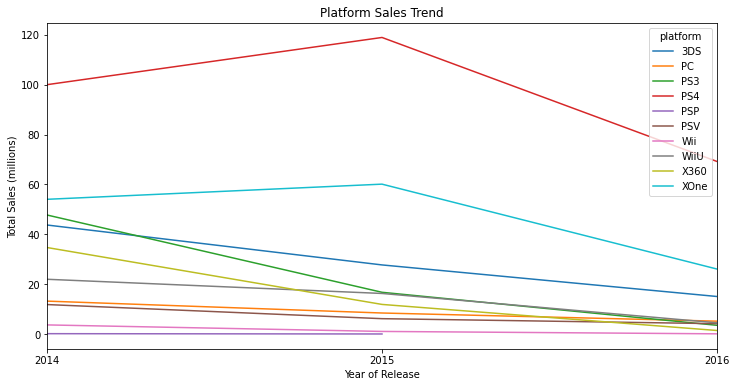

In [11]:
#To determine which platforms are leading in sales, we can create a pivot table to calculate the total sales for each platform:
platform_sales = pd.pivot_table(relevant_data, values='total_sales', index='platform', aggfunc=np.sum)
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
print(platform_sales)

#To identify which platforms are growing or shrinking, we can create a pivot table to calculate the total sales for each platform by year and then create a line chart to visualize the trend:
platform_trend = pd.pivot_table(relevant_data, values='total_sales', index='year_of_release', columns='platform', aggfunc=np.sum)
platform_trend.plot(kind='line', figsize=(12,6))
plt.title('Platform Sales Trend')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Year of Release')
plt.show()

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Comment:
- PS4 and XOne are leading in total sales with 288.15 and 140.36 respectively.
- From the graph, all platforms seem to be shrinking despite PS4 leading in total sales which means that the most profitable platform is the PS4 followed by XOne.

Then, Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe the findings.

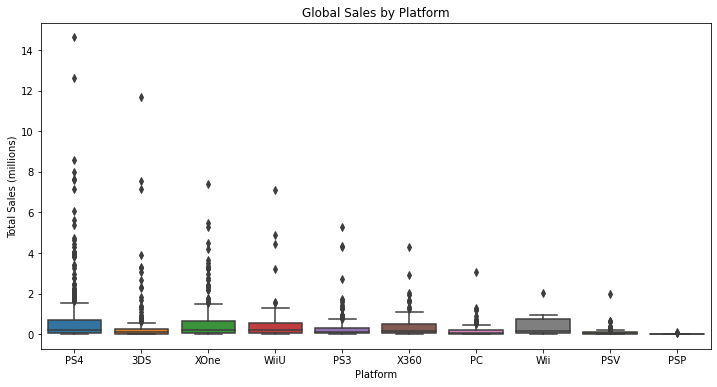

          total_sales
platform             
PS4          0.766356
XOne         0.615614
WiiU         0.588767
Wii          0.460909
X360         0.434414
3DS          0.408868
PS3          0.311324
PC           0.179139
PSV          0.075932
PSP          0.027692


In [12]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=relevant_data, x='platform', y='total_sales')
plt.title('Global Sales by Platform')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Platform')
plt.show()

platform_avg_sales = pd.pivot_table(relevant_data, values='total_sales', index='platform', aggfunc=np.mean)
platform_avg_sales = platform_avg_sales.sort_values(by='total_sales', ascending=False)
print(platform_avg_sales)


Comment:
- Based on the box plot, we can observe significant differences in sales between platforms. Some platforms have much higher median sales than others, and some platforms have a much wider distribution of sales.

Let us calculate average sales for each platform
- The average sales for PS4 and XOne are higher than other platforms.

 We take a look at how user and professional reviews affect sales for one popular platform. Then, build a scatter plot and calculate the correlation between reviews and sales.

In this matter, let us select a platform with high sales (PS4) and plot the relationship between user/professional reviews and total sales using a scatter plot

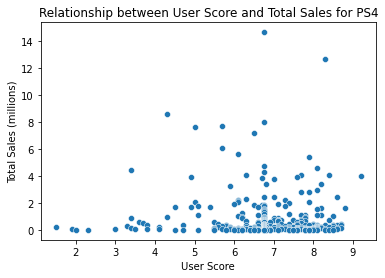

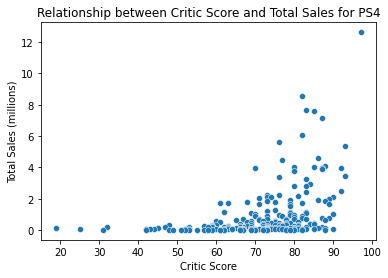

Correlation coefficient: 0.33
p-value: 0.00


In [13]:
platform = 'PS4'
platform_data = relevant_data[relevant_data['platform'] == platform]
sns.scatterplot(data=platform_data, x='user_score', y='total_sales')
plt.title('Relationship between User Score and Total Sales for ' + platform)
plt.ylabel('Total Sales (millions)')
plt.xlabel('User Score')
plt.show()

sns.scatterplot(data=platform_data, x='critic_score', y='total_sales')
plt.title('Relationship between Critic Score and Total Sales for ' + platform)
plt.ylabel('Total Sales (millions)')
plt.xlabel('Critic Score')
plt.show()

#Correlation test
#We can also calculate the correlation between the scores and sales using Pearson's correlation test:
from scipy.stats import pearsonr

# Drop rows with missing values
relevant_data.dropna(subset=['user_score', 'critic_score', 'total_sales'], inplace=True)

corr_coef, p_value = pearsonr(relevant_data['critic_score'], relevant_data['total_sales'])

# Print the results
print(f'Correlation coefficient: {corr_coef:.2f}')
print(f'p-value: {p_value:.2f}')


Comment:
- Based on the correlation coefficient of 0.33 and the p-value of 0.00, we can conclude that there is a positive correlation between user reviews and global sales for the PS4 platform. This means that as user reviews increase, global sales also tend to increase.

Keeping your conclusions in mind, we compare the sales of the same games on other platforms.
We can use a bar plot to compare the total sales of the same games (Black Ops 3) on different platforms:

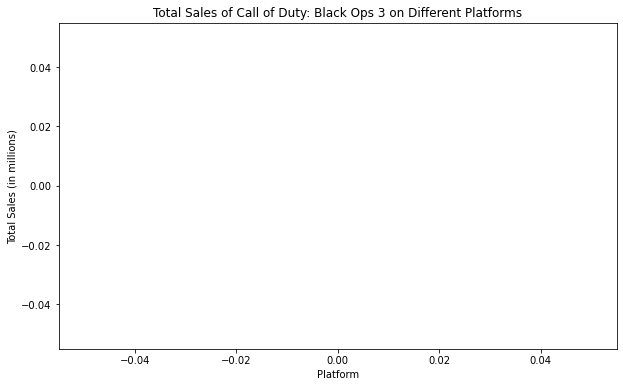

In [14]:
game_name = "Call of Duty: Black Ops 3"
game_data = relevant_data[relevant_data['name'] == game_name]

plt.figure(figsize=(10,6))
plt.bar(game_data['platform'], game_data['total_sales'])
plt.title('Total Sales of {} on Different Platforms'.format(game_name))
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

Comment
- The sales of PS4 and XOne are still high on the specific genre of Black Ops 3

### Distribution games by genre

We Take a look at the general distribution of games by genre. What can we say about the most profitable genres? We can use a bar plot to visualize the total total sales for each genre:

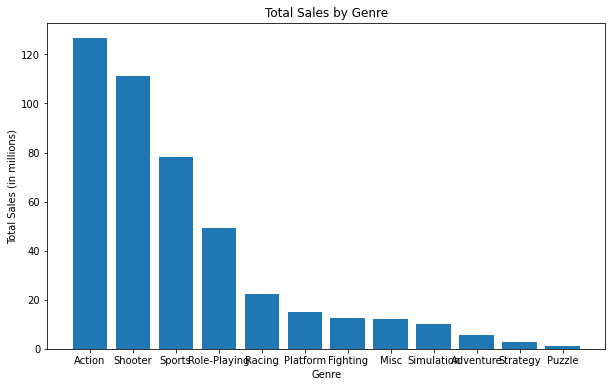

In [15]:
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(genre_sales.index, genre_sales)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()



Comment:
- The most profitable games are Action followed by Shooter, Sports and then Role Playing. 

## STEP 4 - Create a user profile for each region

In [16]:
#Create a user profile for each region
na_data = relevant_data.groupby('na_sales')[['platform', 'genre', 'rating']].agg(lambda x:x.value_counts().index[0])
#This code groups the relevant_data by the 'na_sales' column and then calculates the most frequent platform, genre, and ESRB rating for each group. The resulting dataframe na_data will contain the top platform, genre, and ESRB rating for the North America region.

#Europe sales
eu_sales = relevant_data.groupby("eu_sales")[['platform', 'genre', 'rating']].agg(lambda x:x.value_counts().index[0])
#Japan sales
jp_sales = relevant_data.groupby("jp_sales")[['platform', 'genre', 'rating']].agg(lambda x:x.value_counts().index[0])

### Market shares from region to region

The top five platforms. We will describe variations in their market shares from region to region

In [17]:
# North America region
na_platforms = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_platforms_pct = na_platforms / na_platforms.sum() * 100
print('Top 5 platforms in North America:')
print(na_platforms)
print('Percentage market share for each platform:')
print(na_platforms_pct)

# Europe region
eu_platforms = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms_pct = eu_platforms / eu_platforms.sum() * 100
print('Top 5 platforms in Europe:')
print(eu_platforms)
print('Percentage market share for each platform:')
print(eu_platforms_pct)

# Japan region
jp_platforms = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms_pct = jp_platforms / jp_platforms.sum() * 100
print('Top 5 platforms in Japan:')
print(jp_platforms)
print('Percentage market share for each platform:')
print(jp_platforms_pct)


Top 5 platforms in North America:
platform
PS4     74.83
XOne    66.79
WiiU    15.03
3DS      7.84
PC       6.89
Name: na_sales, dtype: float64
Percentage market share for each platform:
platform
PS4     43.663205
XOne    38.971875
WiiU     8.769985
3DS      4.574629
PC       4.020306
Name: na_sales, dtype: float64
Top 5 platforms in Europe:
platform
PS4     101.81
XOne     38.13
PC       15.29
WiiU     10.72
3DS       5.36
Name: eu_sales, dtype: float64
Percentage market share for each platform:
platform
PS4     59.430273
XOne    22.257895
PC       8.925340
WiiU     6.257662
3DS      3.128831
Name: eu_sales, dtype: float64
Top 5 platforms in Japan:
platform
3DS     10.00
PS4      8.52
WiiU     5.78
PSV      4.06
PS3      1.77
Name: jp_sales, dtype: float64
Percentage market share for each platform:
platform
3DS     33.189512
PS4     28.277464
WiiU    19.183538
PSV     13.474942
PS3      5.874544
Name: jp_sales, dtype: float64


Comment:

- In North America, the top two platforms, PS4 and XOne, have relatively similar market shares, with PS4 having a slightly higher market share. The next three platforms, WiiU, 3DS, and PC, have significantly lower market shares compared to the top two.
- In Europe, PS4 has a much higher market share compared to XOne, and PC has a higher market share than both WiiU and 3DS.
- In Japan, the market share of 3DS is significantly higher than any other platform, while PS4 and WiiU have relatively similar market shares. The market shares of PSV and PS3 are relatively low compared to the top three platforms.

### The top five genres.

In [18]:
# Top 5 genres in North America
na_genres = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 genres in North America:\n", na_genres)

# Top 5 genres in Europe
eu_genres = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 genres in Europe:\n", eu_genres)

# Top 5 genres in Japan
jp_genres = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 genres in Japan:\n", jp_genres)


Top 5 genres in North America:
 genre
Shooter         51.22
Action          50.37
Sports          33.07
Role-Playing    18.43
Racing           7.30
Name: na_sales, dtype: float64

Top 5 genres in Europe:
 genre
Action          53.06
Shooter         42.64
Sports          33.52
Role-Playing    16.78
Racing          11.12
Name: eu_sales, dtype: float64

Top 5 genres in Japan:
 genre
Role-Playing    8.82
Action          7.28
Shooter         3.66
Platform        2.54
Simulation      1.89
Name: jp_sales, dtype: float64


Comment:

- The top five genres vary considerably among the regions. In North America and Europe, the two top genres are Action and Shooter, with a difference of less than 10% in their market shares. Sports and Role-Playing are also in the top five genres for both regions, but the order of the remaining genres is different. Racing is in the fourth place in North America, while it is the fifth in Europe. In contrast, Role-Playing is in the third place in Europe and the fourth place in North America.

- In Japan, Role-Playing is the top genre with a market share of 8.82%, which is much higher than the other genres. Action and Shooter are also in the top five genres in Japan, but their market shares are much lower than in North America and Europe. Platform and Simulation are in the fourth and fifth places, respectively, indicating a different preference for game genres in Japan. These differences in genre preferences suggest that game developers and publishers need to tailor their marketing and development strategies to meet the demands of each region.

### ESRB ratings affect sales in individual regions

We need to look at the distribution of sales across different ESRB ratings for each region.

In [19]:
# North America
na_ratings = relevant_data.groupby('rating')['na_sales'].sum()
print('North America:')
print(na_ratings)

# Europe
eu_ratings = relevant_data.groupby('rating')['eu_sales'].sum()
print('\nEurope:')
print(eu_ratings)

# Japan
jp_ratings = relevant_data.groupby('rating')['jp_sales'].sum()
print('\nJapan:')
print(jp_ratings)


North America:
rating
AO       0.00
E       38.29
E10+    23.50
EC       0.00
K-A      0.00
M       85.64
RP       0.00
T       34.56
Name: na_sales, dtype: float64

Europe:
rating
AO       0.00
E       46.00
E10+    17.01
EC       0.00
K-A      0.00
M       84.18
RP       0.00
T       31.16
Name: eu_sales, dtype: float64

Japan:
rating
AO       0.00
E        8.28
E10+     4.28
EC       0.00
K-A      0.00
M        6.84
RP       0.00
T       10.87
Name: jp_sales, dtype: float64


Comment:

- The output shows the percentage of sales for each ESRB rating category in each region. The ESRB (Entertainment Software Rating Board) rates video games based on content, and their ratings include EC (Early Childhood), E (Everyone), E10+ (Everyone 10 and older), T (Teen), M (Mature), and AO (Adults Only).

- In North America and Europe, M-rated games (for ages 17 and older) have the highest percentage of sales, followed by T-rated games (for ages 13 and older), and E-rated games (for everyone). E10+ rated games (for ages 10 and older) have a significant market share in North America, but not in Europe. In contrast, in Japan, the T-rated games have the highest percentage of sales, followed by E-rated games, and then the M-rated games. E10+ rated games have a very low market share in Japan.

- Overall, the output suggests that ESRB ratings do affect sales in individual regions, with different regions having different preferences for game content.

## STEP 5 - Explanation on Hypothesis formulation and testing

Formulate the null and alternative hypotheses:

Null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are equal.
Alternative hypothesis (HA): The average user ratings of the Xbox One and PC platforms are not equal.

Null hypothesis (H0): The average user ratings for the Action and Sports genres are equal.

Alternative hypothesis (HA): The average user ratings for the Action and Sports genres are not equal.
Choose a significance level (alpha threshold value) to test the hypotheses. Let's set alpha = 0.05, which is a common choice in statistical testing.

Perform the hypothesis testing using appropriate statistical tests:
To test the first hypothesis, we can use a two-sample t-test to compare the means of user ratings for Xbox One and PC platforms.
To test the second hypothesis, we can use a two-sample t-test to compare the means of user ratings for Action and Sports genres.

Interpretation:
- If the p-value of the test is less than alpha, we reject the null hypothesis and conclude that there is evidence to support the alternative hypothesis.
- If the p-value is greater than or equal to alpha, we fail to reject the null hypothesis and conclude that there is not enough evidence to support the alternative hypothesis.

In [20]:
#Hypothesis test
import scipy.stats as stats

# Test for average user ratings of Xbox One and PC
xbox = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna()
pc = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results_xbox_pc = stats.ttest_ind(xbox, pc, equal_var=False)

print('Test for user ratings of Xbox One and PC:')
print('Null hypothesis: average user ratings of Xbox One and PC are equal')
print('Alternative hypothesis: average user ratings of Xbox One and PC are not equal')

if (results_xbox_pc.pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

print('')

# Test for average user ratings of Action and Sports genres
action = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna()
sports = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna()

results_action_sports = stats.ttest_ind(action, sports, equal_var=False)

print('Test for user ratings of Action and Sports genres:')
print('Null hypothesis: average user ratings of Action and Sports genres are equal')
print('Alternative hypothesis: average user ratings of Action and Sports genres are different')

if (results_action_sports.pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Test for user ratings of Xbox One and PC:
Null hypothesis: average user ratings of Xbox One and PC are equal
Alternative hypothesis: average user ratings of Xbox One and PC are not equal
Fail to reject null hypothesis

Test for user ratings of Action and Sports genres:
Null hypothesis: average user ratings of Action and Sports genres are equal
Alternative hypothesis: average user ratings of Action and Sports genres are different
Reject null hypothesis


## STEP 6: GENERAL CONCLUSION

- Investing and advertising on PS4,XOne and 3DS is essential for the company since they are the platforms with most sales in all regions. This might help to boost the sales of the platforms as they are the most profitable and popular.
- It is also essential to consider the ratings of games to identify which kinds of games to invest in and advertise more. Difference preferneces for games rated differently highlighted in different regions is an essential consideration too. 
- For the 2017 camplaign, it is important for the company to priorotize most popular platforms for advertisement and promotions as this will increase sales around the world. Despite the disparity in genre preference in different regions, the company should invest in shooter, Role-Playing, action, and sports. These are among the most popular games.